In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
df = pd.read_csv('StudentsPerformance.csv')

In [75]:
df.shape

(1000, 8)

In [76]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [78]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


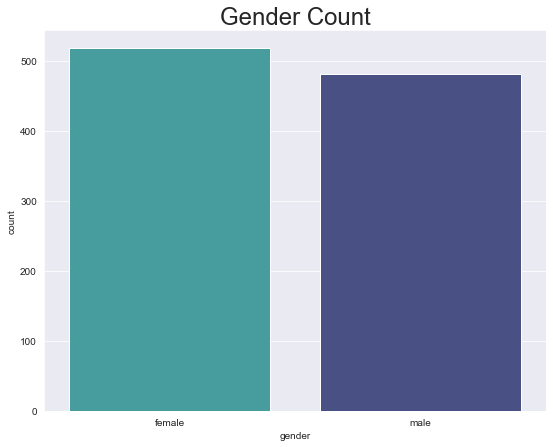

In [79]:
plt.figure(figsize=(9,7))
plt.title('Gender Count', size = 24)
sns.countplot(x="gender", data=df, palette="mako_r")

In [80]:
df['gender'] = df.gender.apply(lambda x: 1 if x == "female" else 0)

In [81]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

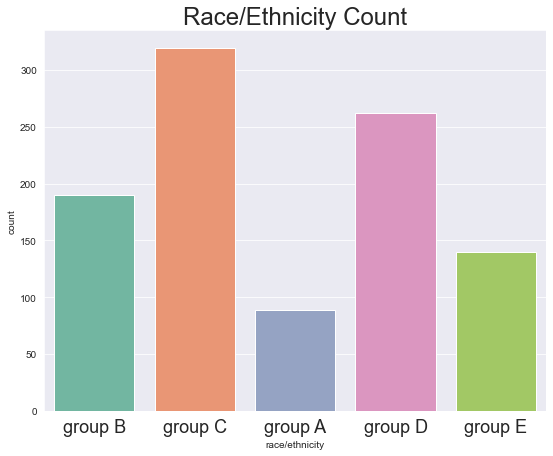

In [82]:
plt.figure(figsize=(9,7))
plt.title('Race/Ethnicity Count', size = 24)
plt.xticks(size=18)
sns.countplot(x="race/ethnicity", data=df, palette="Set2")

In [ ]:
#pd.get_dummies(df['race/ethnicity'], drop_first=True)

In [83]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

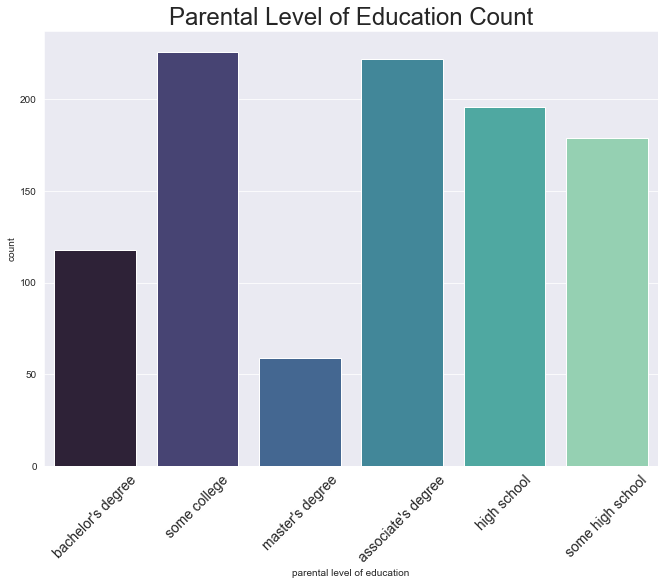

In [84]:
plt.figure(figsize=(11,8))
plt.title('Parental Level of Education Count', size = 24)
plt.xticks(size=14, rotation=45)
sns.countplot(x="parental level of education", data=df, palette="mako")

In [ ]:
#pd.get_dummies(df['parental level of education'], drop_first=True)

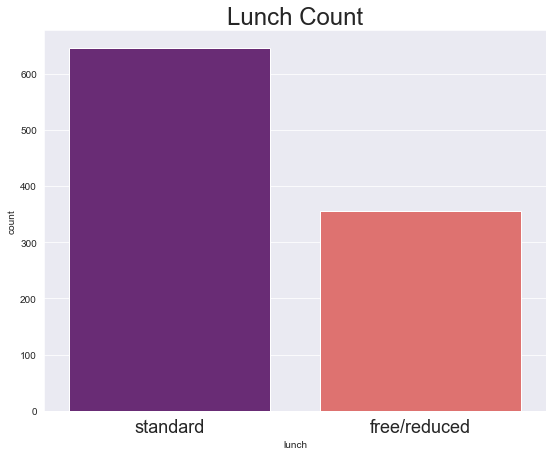

In [85]:
plt.figure(figsize=(9,7))
plt.title('Lunch Count', size = 24)
plt.xticks(size=18)
sns.countplot(x="lunch", data=df, palette="magma")

In [86]:
df['lunch'] = df.lunch.apply(lambda x: 1 if x == "standard" else 0)

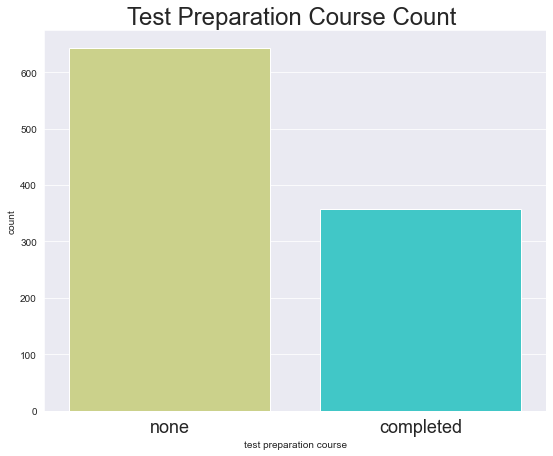

In [88]:
plt.figure(figsize=(9,7))
plt.title('Test Preparation Course Count ', size = 24)
plt.xticks(size=18)
sns.countplot(x="test preparation course", data=df, palette="rainbow_r")

In [91]:
df['test preparation course'] = df['test preparation course'].apply(lambda x: 1 if x == "completed" else 0)

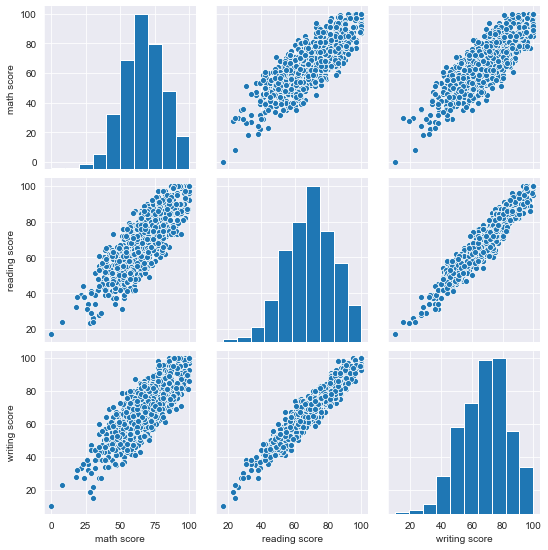

In [98]:
sns.pairplot(df[['math score', 'reading score', 'writing score']]);

In [104]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']

In [105]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,1,group B,bachelor's degree,1,0,72,72,74,218
1,1,group C,some college,1,1,69,90,88,247
2,1,group B,master's degree,1,0,90,95,93,278
3,0,group A,associate's degree,0,0,47,57,44,148
4,0,group C,some college,1,0,76,78,75,229


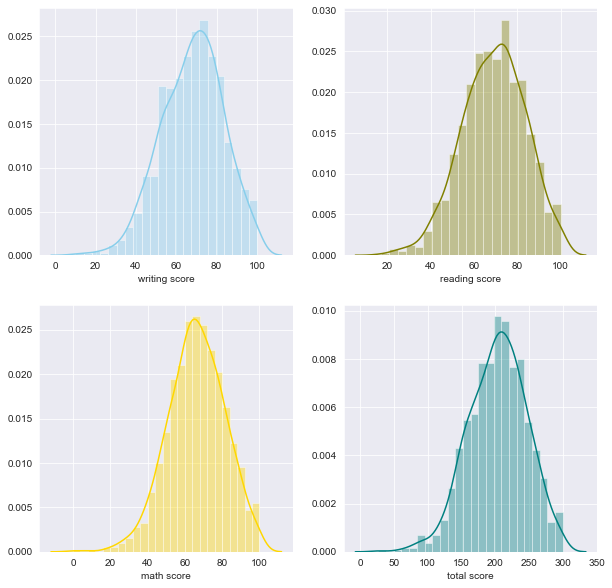

In [201]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.distplot(df['writing score'], kde=True, color="skyblue", ax=axs[0, 0])
sns.distplot(df["reading score"], kde=True, color="olive", ax=axs[0, 1])
sns.distplot(df["math score"], kde=True, color="gold", ax=axs[1, 0])
sns.distplot(df["total score"], kde=True, color="teal", ax=axs[1, 1])

plt.show()

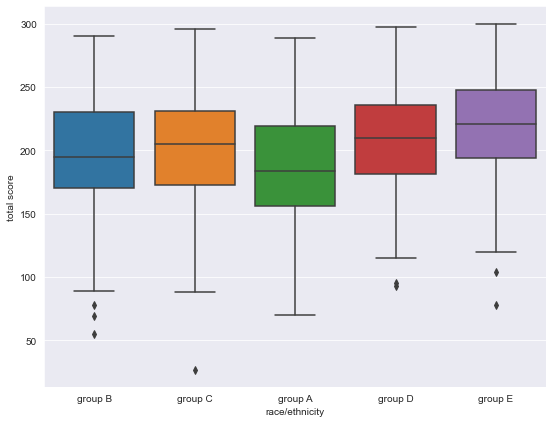

In [106]:
plt.figure(figsize=(9,7))
sns.boxplot( x=df["race/ethnicity"], y=df["total score"])

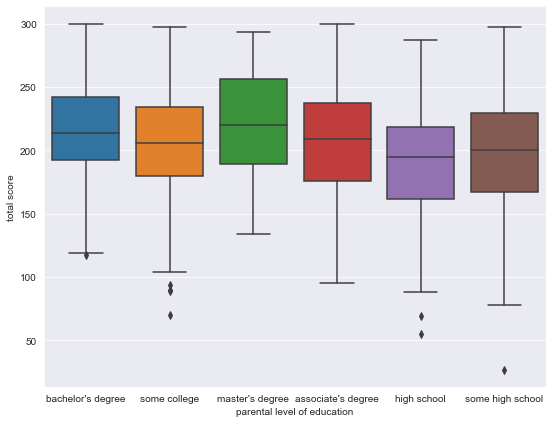

In [107]:
plt.figure(figsize=(9,7))
sns.boxplot( x=df["parental level of education"], y=df["total score"])

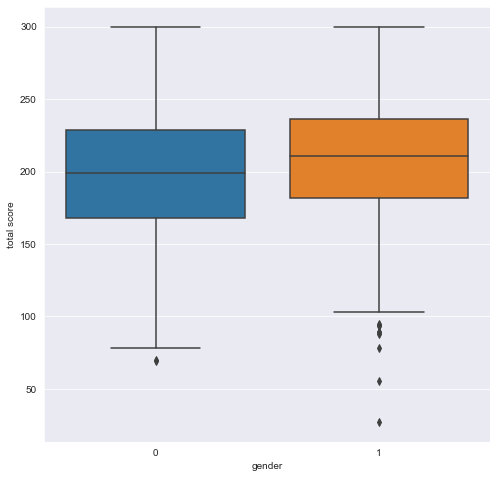

In [109]:
plt.figure(figsize=(8,8))
sns.boxplot( x=df["gender"], y=df["total score"])

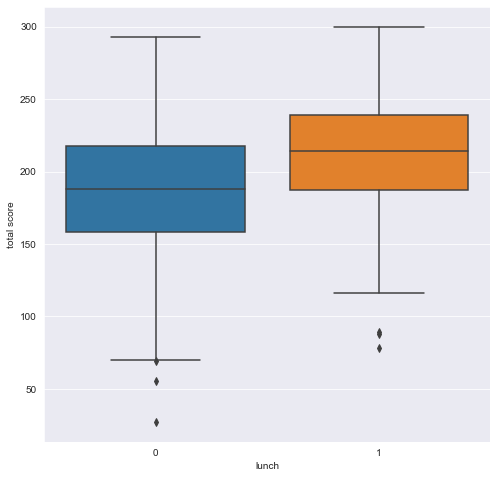

In [114]:
plt.figure(figsize=(8,8))
sns.boxplot( x=df["lunch"], y=df["total score"])

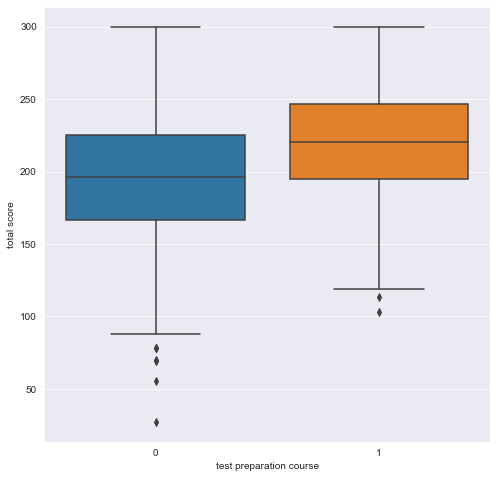

In [115]:
plt.figure(figsize=(8,8))
sns.boxplot( x=df["test preparation course"], y=df["total score"])

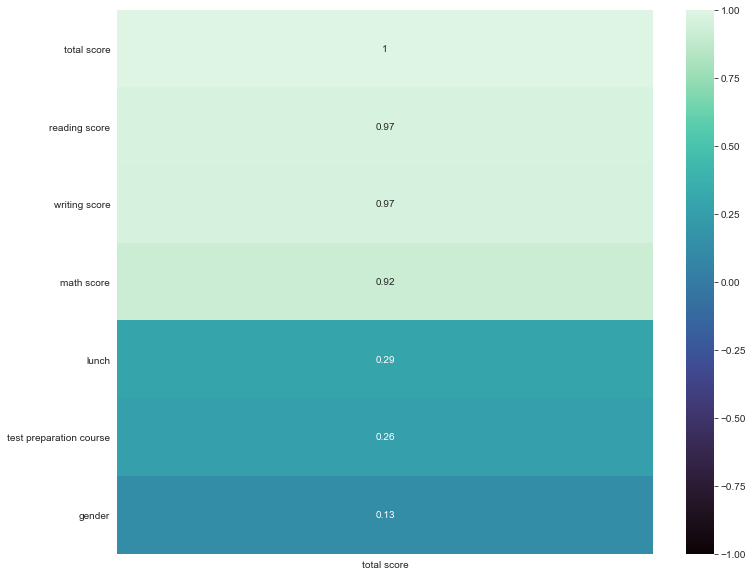

In [149]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr()[['total score']].sort_values(by='total score', ascending=False), annot=True, vmin=-1, vmax=1, cmap='mako');

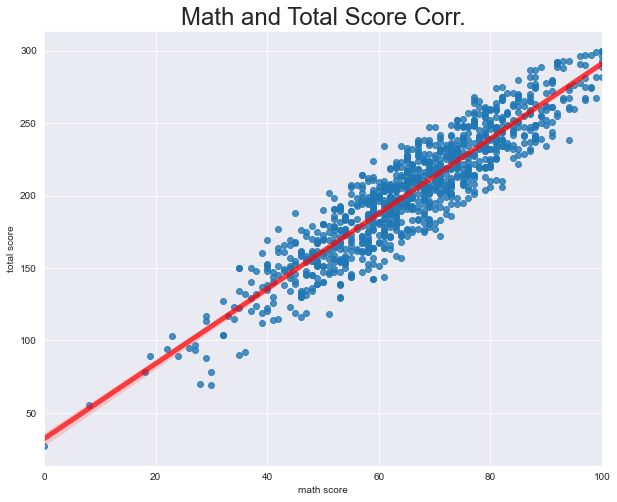

In [188]:
plt.figure(figsize=(10,8))
plt.title('Math and Total Score Corr.', size = 24)
sns.regplot(x=df["math score"], y=df['total score'], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

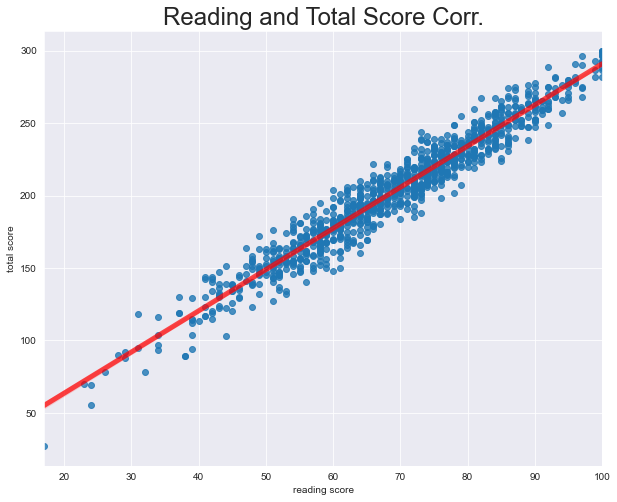

In [187]:
plt.figure(figsize=(10,8))
plt.title('Reading and Total Score Corr.', size = 24)
sns.regplot(x=df["reading score"], y=df['total score'], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

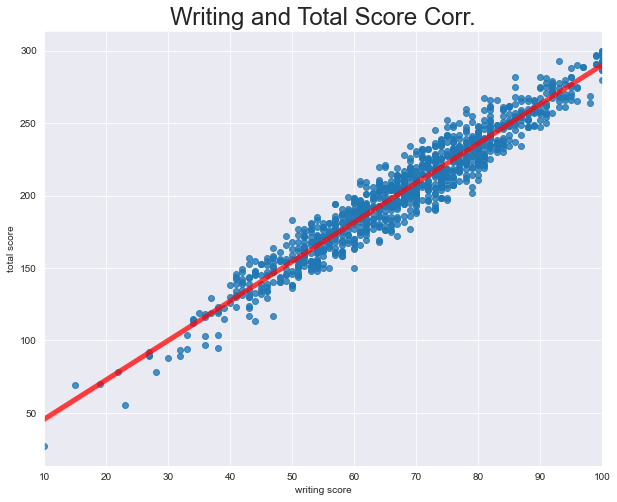

In [186]:
plt.figure(figsize=(10,8))
plt.title('Writing and Total Score Corr.', size = 24)
sns.regplot(x=df["writing score"], y=df['total score'], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

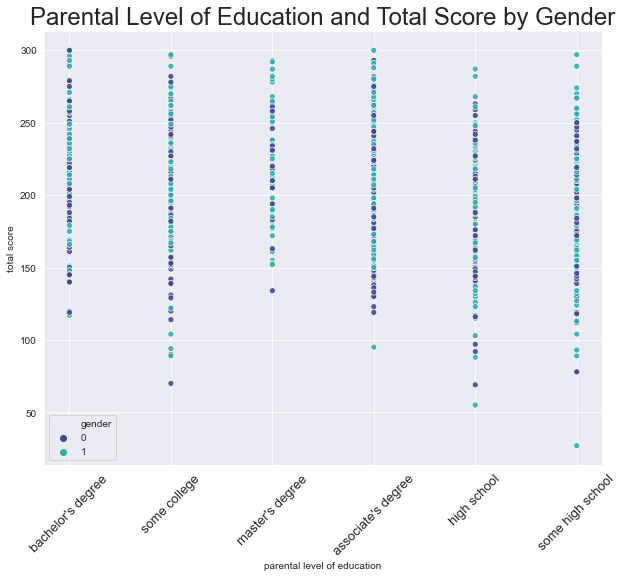

In [202]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x="parental level of education", y="total score", hue='gender', palette="mako", alpha=0.9, lw=5, sizes=(20, 400))
plt.title('Parental Level of Education and Total Score by Gender', size = 24)
plt.xticks(size=13, rotation=45)
plt.show()

In [190]:
# Identifying outliers 
print(df['reading score'].quantile(0.50))
print(df['reading score'].quantile(0.95))
print(df['writing score'].quantile(0.50))
print(df['writing score'].quantile(0.95))

70.0
92.0
69.0
92.0


In [203]:
df.to_csv('df_model.csv', index=False)